Resubmitting after implementing suggestions.

Importing required libraries

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#
haberman = pd.read_csv('haberman.csv',names=['Age','Operation_year','axil_nodes','survival_status'])


In [45]:
#no of columns and rows in dataset
haberman.shape

(306, 4)

In [46]:
# We have  4 columns in the dataset
haberman.columns

Index(['Age', 'Operation_year', 'axil_nodes', 'survival_status'], dtype='object')

In [47]:
list(haberman.columns[:-1])

['Age', 'Operation_year', 'axil_nodes']

# Attribute Information:
    1. Age of patient at time of operation (numerical)
    2. Patient's year of operation (year - 1900, numerical)
    3.Number of positive axillary nodes detected (numerical)
    4.Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [48]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                306 non-null int64
Operation_year     306 non-null int64
axil_nodes         306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


**Observaton:**

*     Dataset contains 305 records excluding header.
*     There are no missing values for any features.

In [49]:
haberman["survival_status"] = haberman["survival_status"].astype('object')

In [50]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                306 non-null int64
Operation_year     306 non-null int64
axil_nodes         306 non-null int64
survival_status    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [51]:
print(haberman["survival_status"].value_counts())
print(haberman["survival_status"].value_counts(normalize=True))


1    225
2     81
Name: survival_status, dtype: int64
1    0.735294
2    0.264706
Name: survival_status, dtype: float64


**Observations:**
*    Patients survived after 5 years after going through operations are 225 which is 73.25%.
*    Patients died before 5 years after going through operations are 81 which is 26.47%.

This is an Imbalanced Datatset.

In [52]:
haberman.describe()

,Age,Operation_year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


**Observations:**
*    75% patients have positive axillary nodes <= 4 and 25% have positive axillary nodes equal to 0.Whereas maximum observable positive axillary node is 52 ( might be an outlier).
*    The age of patients vaires from 30 to 83 with the mean of 52.

# OBJECTIVE:
To predict whether patient will survive or not after 5 years after operation given patient's Age, Year of Operation and Number of Positive axillary nodes.

# Univariate Analysis


# HISTOGRAM, PDF, CDF

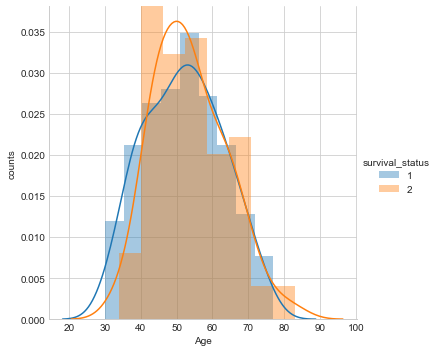

In [53]:
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();

plt.ylabel("counts")
plt.show();


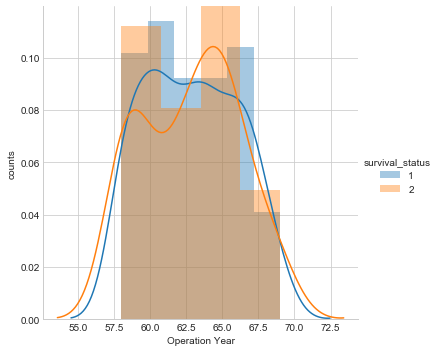

In [54]:
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "Operation_year") \
   .add_legend();

plt.ylabel("counts")
plt.xlabel("Operation Year")
plt.show();

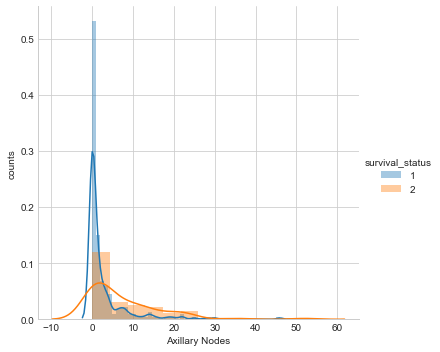

In [55]:
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();

plt.ylabel("counts")
plt.xlabel("Axillary Nodes")
plt.show();

**OBSERVATIONS**:
*    Both age and year plots are overlapped and not able to infer any meaning from those graphs.
*   Patient having Axillary nodes < 2 has greater chance of survival.


Let's plot CDF to have a more intuition.

In [56]:
haberman_yes = haberman.loc[haberman["survival_status"] == 1];
haberman_no = haberman.loc[haberman["survival_status"] == 2];

In [57]:
haberman_yes.describe()

,Age,Operation_year,axil_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [58]:
haberman_no.describe()

,Age,Operation_year,axil_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


**OBERSVAIONS:**
*    Patients having hight number of axillary nodes have a less chance of survival. Mean for dead patients within 5 years is 7.5 and for survived patients after 5 years is 2.79.

Let's plot CDF for axillary nodes

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


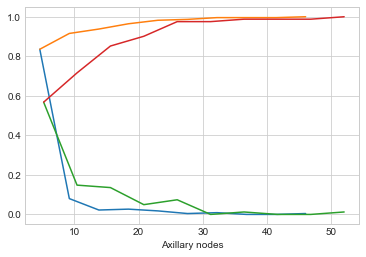

In [59]:

counts, bin_edges = np.histogram(haberman_yes['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)





counts, bin_edges = np.histogram(haberman_no['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Axillary nodes")

plt.show();

# Box-Plots

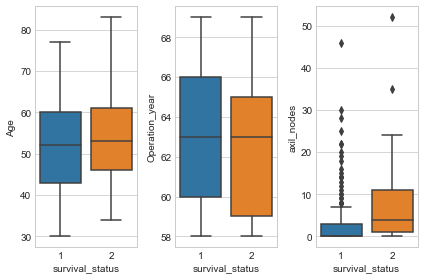

In [60]:
plt.subplot(1,3,1)
sns.boxplot(x='survival_status',y='Age', data=haberman)
plt.subplot(1,3,2)
sns.boxplot(x='survival_status',y='Operation_year', data=haberman)
plt.subplot(1,3,3)
sns.boxplot(x='survival_status',y='axil_nodes', data=haberman)
plt.tight_layout()
plt.show()

In [61]:
print(haberman_yes.loc[haberman_yes["axil_nodes"] <= 3]["survival_status"].value_counts())
print("\npercentage of survived pateints having positive axillary nodes less than or equal to 3.\n ")
print(haberman_yes.loc[haberman_yes["axil_nodes"] <= 3]["survival_status"].value_counts() / haberman_yes["survival_status"].value_counts()*100)
#data["survival_status"].value_counts()

1    178
Name: survival_status, dtype: int64

percentage of survived pateints having positive axillary nodes less than or equal to 3.
 
1    79.111111
Name: survival_status, dtype: float64


**OBSERVATION:**
*    From above plot it's clear that patients having axillary nodes less than or equal to 3 will have a high probability of survival.
*    79% of survived patients have auxillary nodes less than or equal to 3.
*    As the age of patients increases his chances of survival decreases.

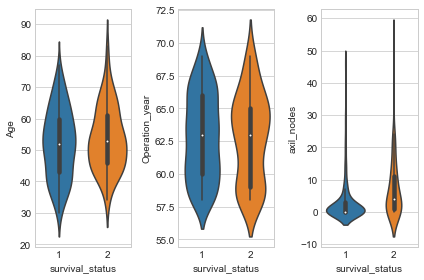

In [62]:
plt.subplot(1,3,1)
sns.violinplot(x="survival_status", y="Age", data=haberman, size=8)

plt.subplot(1,3,2)
sns.violinplot(x="survival_status", y="Operation_year", data=haberman, size=8)
plt.subplot(1,3,3)
sns.violinplot(x="survival_status", y="axil_nodes", data=haberman, size=8)
plt.tight_layout()

plt.show()

**Observations**
*    Patients treated after 65 has better chance of survival.
*    patients having axillary nodes less than 3 has better chances of survival.

# BI-VARIATE ANALYSIS

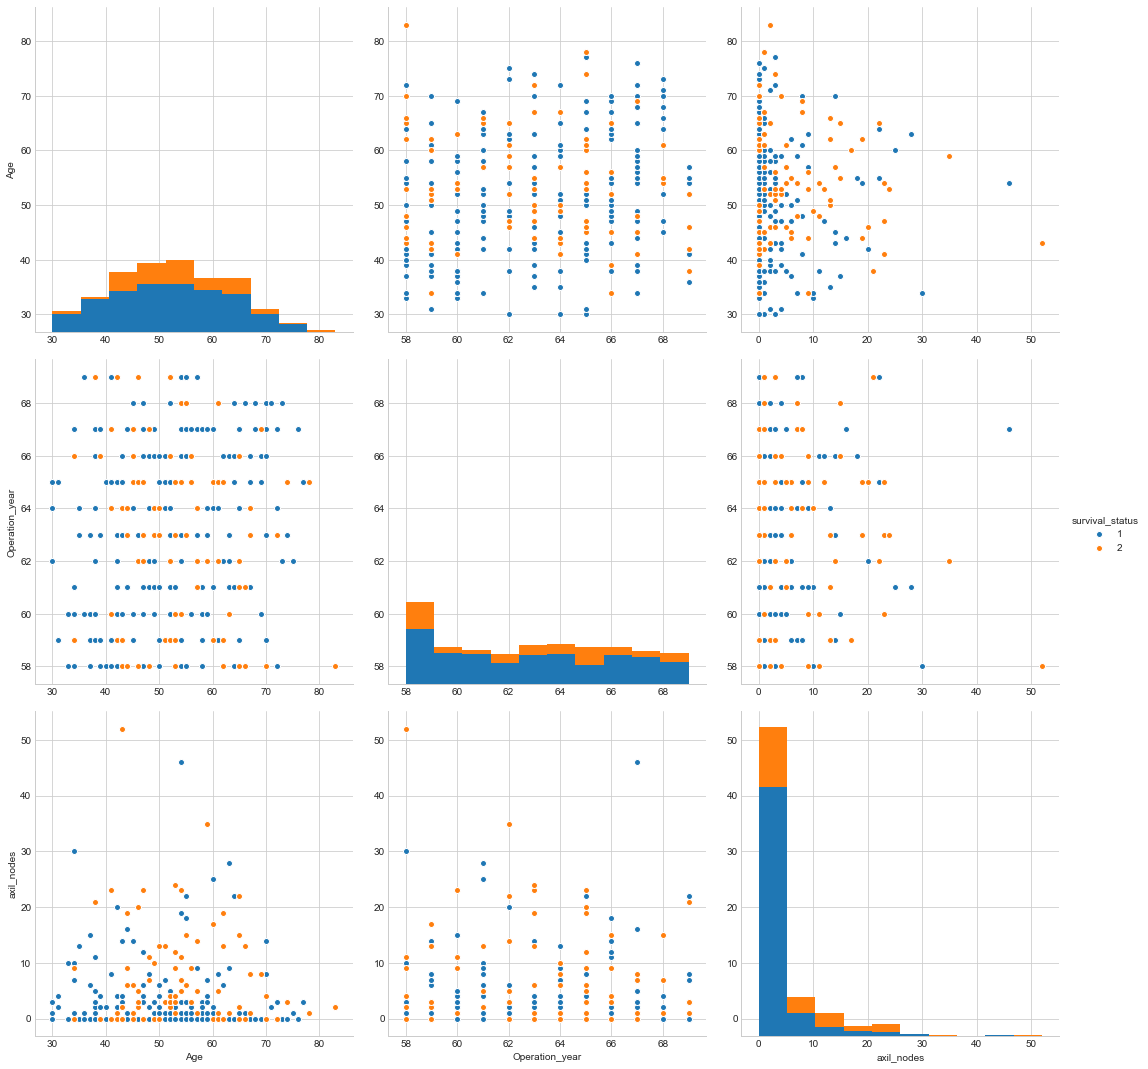

In [63]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status", x_vars = list(haberman.columns[:-1]), y_vars = list(haberman.columns[:-1]), size=5);
plt.show()
#seems like I need to modify survival status data type. 

Not able to infer anything from above plots.

#CONTOUR PLOTS

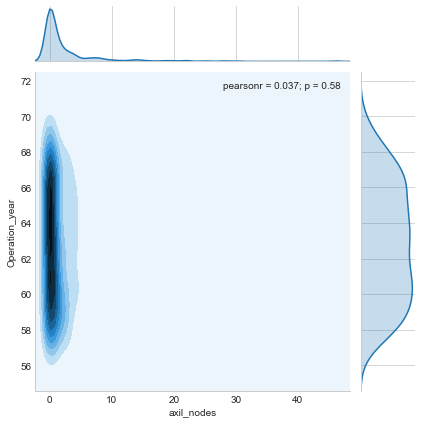

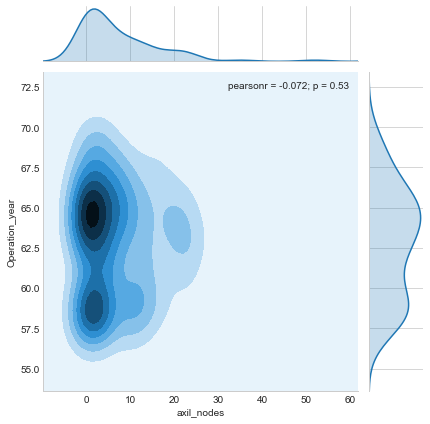

In [64]:

sns.jointplot(x="axil_nodes", y="Operation_year", data=haberman_yes, kind="kde");

sns.jointplot(x="axil_nodes", y="Operation_year", data=haberman_no, kind="kde");

plt.show();

**OBSERVATIONS**
*    Pateints treated after 66 and having positive axillary nodes less than 3 will have great chances of survival.


# CONCLUSION

*    Pateints chances of survival increases if he has auxillary nodes less than or equal to 3.
*    Patients chances of survival decreases as age increases.
*    Patients treated after 65 has more chances of survival.